In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 4;
D = np.empty((N, N), dtype=np.cdouble);
W = np.exp(-1j*2*np.pi/N)
k = np.arange(N)
for n in np.arange(N):
    D[:, n]= W**(k*n)
print(np.round(D))

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.-0.j, -0.+1.j],
       [ 1.+0.j, -1.-0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j, -0.+1.j, -1.-0.j,  0.-1.j]])

In [4]:
%%timeit
x=np.array([[1, 2, 3, 4]]).T
X=D@x;
np.round(X)

11.6 µs ± 486 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
x=np.array([[1, 2, 3, 4]]).T
X=D@x;
np.round(X)

array([[10.+0.j],
       [-2.+2.j],
       [-2.-0.j],
       [-2.-2.j]])

In [6]:
%%timeit
from scipy import fft
fft.fft(x, axis=0)

8.29 µs ± 480 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
from scipy import fft
fft.fft(x, axis=0)

array([[10.-0.j],
       [-2.+2.j],
       [-2.-0.j],
       [-2.-2.j]])

In [8]:
%%timeit
x=[1,2,3,4]
X=[0,0,0,0]
for k in range(4):
    for n in range(4):
        X[k]=X[k]+x[n]*np.exp(-1j*2*np.pi*n*k/4)
np.round(X)

43.9 µs ± 6.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
x=[1,2,3,4]
X=[0,0,0,0]
for k in range(4):
    for n in range(4):
        X[k]=X[k]+x[n]*np.exp(-1j*2*np.pi*n*k/4)
np.round(X)

array([10.+0.j, -2.+2.j, -2.-0.j, -2.-2.j])

In [10]:
N = 64;
D = np.empty((N, N), dtype=np.cdouble);
W = np.exp(-1j*2*np.pi/N)
k = np.arange(N)
for n in np.arange(N):
    D[:, n]= W**(k*n)
np.round(D)

array([[1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.-0.j, 1.-0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.-0.j, 1.-0.j, ..., 1.+1.j, 1.+0.j, 1.+0.j],
       ...,
       [1.+0.j, 1.+0.j, 1.+1.j, ..., 1.-1.j, 1.-1.j, 1.-0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.-1.j, 1.-0.j, 1.-0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.-0.j, 1.-0.j, 1.-0.j]])

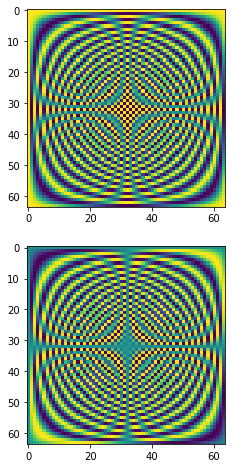

In [11]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(8,8))
ax1.imshow(D.real)
ax2.imshow(D.imag)